In [1]:
from coviddata import CovidData
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime, timedelta

In [2]:
covid = CovidData('MB')

In [3]:
covid.latest_data

{'date': '2021-06-18',
 'change_cases': 183,
 'change_fatalities': 3,
 'change_tests': 2123,
 'change_hospitalizations': -8,
 'change_criticals': 0,
 'change_recoveries': 276,
 'change_vaccinations': 16387,
 'change_vaccinated': 14975,
 'change_vaccines_distributed': 0,
 'total_cases': 55098,
 'total_fatalities': 1115,
 'total_tests': 811572,
 'total_hospitalizations': 238,
 'total_criticals': 60,
 'total_recoveries': 51547,
 'total_vaccinations': 1111776,
 'total_vaccinated': 261062,
 'total_vaccines_distributed': 1242140}

In [4]:
print(f"{covid.new_cases} new cases in the province ({covid.total_active} active)")
print(f"{covid.test_positivity:.2%} test positivity rate")
print(f"{covid.new_deaths} new deaths ({covid.total_deaths} total)")
print(f"{covid.new_vaccinations} new vaccinations")
print(f"{covid.total_vaccinations} total doses administered")
print(f"{covid.total_vaccines_recieved-covid.total_vaccinations} doses in storage")
print(f"{covid.total_vaccinations / covid.total_vaccines_recieved:.2%} of all doses received administered")
print(f"{np.mean([i['change_vaccinations'] for i in covid.data[-7:]], dtype=int)} vaccines being administered daily (7 day average)")

183 new cases in the province (2436 active)
7.68% test positivity rate
3 new deaths (1115 total)
16387 new vaccinations
1111776 total doses administered
130364 doses in storage
89.50% of all doses received administered
15386 vaccines being administered daily (7 day average)


In [5]:
DAYS = 30
AVG_SIZE = 7
dates = []
new_cases = []
avg_cases = []
new_vaccinations = []
avg_vaccinations = []
recieved = []
administered = []
hospitalizations = []
criticals = []
for i, data in enumerate(covid.data[-DAYS:]):
    dates.append(data['date'])
    new_cases.append(data['change_cases'])
    new_vaccinations.append(data['change_vaccinations'])
    administered.append(data['total_vaccinations'])
    recieved.append(data['total_vaccines_distributed'])
    hospitalizations.append(data['total_hospitalizations'])
    criticals.append(data['total_criticals'])
    if i >= AVG_SIZE:
        avg_cases.append(np.mean(new_cases[i-AVG_SIZE:i+AVG_SIZE]))
        avg_vaccinations.append(np.mean(new_vaccinations[i-AVG_SIZE:i+AVG_SIZE]))
labels = [dates[i] for i in np.linspace(0, DAYS-1, 10, dtype=int)]

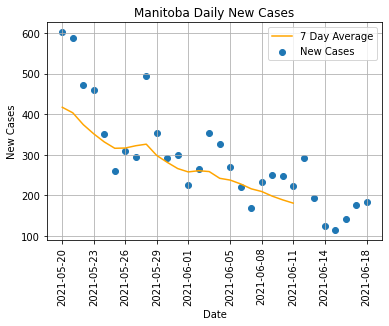

In [6]:
plt.title('Manitoba Daily New Cases')
plt.scatter(dates, new_cases, label='New Cases')
plt.plot(dates[0:len(avg_cases)], avg_cases, label='7 Day Average', color='orange')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(labels, rotation='vertical')
plt.grid()
plt.legend()
plt.show()

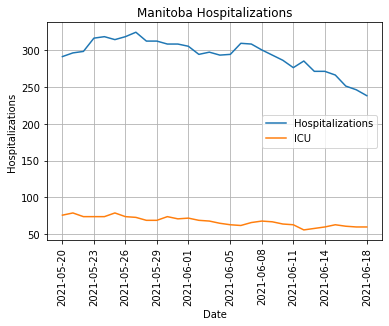

In [7]:
plt.title('Manitoba Hospitalizations')
plt.plot(dates, hospitalizations, label ='Hospitalizations')
plt.plot(dates, criticals, label='ICU')
plt.xlabel('Date')
plt.ylabel('Hospitalizations')
plt.xticks(labels, rotation='vertical')
plt.grid()
plt.legend()
plt.show()

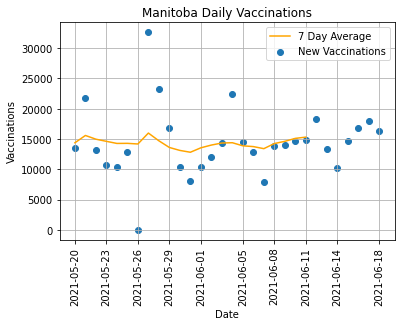

In [8]:
plt.title('Manitoba Daily Vaccinations')
plt.scatter(dates, new_vaccinations, label='New Vaccinations')
plt.plot(dates[0:len(avg_vaccinations)], avg_vaccinations, label='7 Day Average', color='orange')
plt.xlabel('Date')
plt.ylabel('Vaccinations')
plt.xticks(labels, rotation='vertical')
plt.grid()
plt.legend()
plt.show()

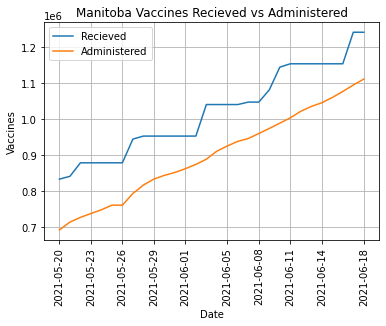

In [9]:
plt.title('Manitoba Vaccines Recieved vs Administered')
plt.plot(dates, recieved, label='Recieved')
plt.plot(dates, administered, label='Administered')
plt.xlabel('Date')
plt.ylabel('Vaccines')
plt.xticks(labels, rotation='vertical')
plt.grid()
plt.legend()
plt.show()

In [10]:
children = covid.population - 1175703
fully_vaccinated = covid.latest_data['total_vaccinated']
one_dose = covid.latest_data['total_vaccinations'] - fully_vaccinated
unvaccinated_adults = covid.population - children - fully_vaccinated - one_dose

plt.pie(
    [unvaccinated_adults, children, fully_vaccinated, one_dose],
    labels=['Unvaccinated Adults', 'Children', 'Fully Vaccinated', 'Partially Vacccinated'],
    autopct='%1.1f%%'
)
plt.title('Manitoba Percent Vaccinated')
plt.show()

ValueError: Wedge sizes 'x' must be non negative values